In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

# 1) Loading and Viewing the Dataset

In [2]:
#We load the dataset and look at the overall statistics such as mean, count, and median.

music = pd.read_csv("music_genre.csv")
music


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [3]:
music.info()
music.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


# 2) Data Cleaning

### 2a) Check for and remove duplicates

It seems there are duplicated samples in the dataset. These are taken out and stored in duplicated.

In [4]:
music.duplicated().any()
duplicated = music.duplicated()

Duplicated rows are shown below. These are 4 lines all holding NaN values.

In [5]:
music[duplicated]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To double check duplicted rows, the code line below loads the entries above and below NaN containing samples. It confirms that samples No. 10000, 10001, 10002, 10003, 10004 are identical. These are not only duplicated but hold only NaNs. For this reason, they are removed.

In [6]:
music.iloc[9999:10006]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9999,41509.0,Hachioji P,Yeah! Yeah!! Yeah!!!,14.0,0.02000,0.573,226374.0,0.921,0.000004,F#,0.325,-3.841,Major,0.0734,135.029,4-Apr,0.599,Anime
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,77089.0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.621,0.029700,G,0.159,-7.429,Major,0.0382,142.065,4-Apr,0.607,Jazz


In [7]:
music.drop([10000, 10001, 10002, 10003, 10004], inplace = True)

In the dataset, we have also spotted some rows under column "Duration_ms" containing values of -1 which may produce errors in our findings, hence we remove them

In [8]:
music.drop(music[music['duration_ms'] == -1.0].index, inplace = True)
music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,4-Apr,0.629,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


 It turns out that tempo column has error values. Tempo means the speed at which a piece of music should be played. Instead of floats, some samples (4720) have a question mark (?) in this feature (see below). 

In [9]:
music[music["tempo"] == "?"]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
36,55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
41,83854.0,UNKLE,Lonely Soul,51.0,0.07760,0.475,533013.0,0.591,0.054900,A,0.1090,-7.854,Minor,0.0374,?,4-Apr,0.1230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,63058.0,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
49964,53387.0,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
49967,76585.0,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop
49976,79654.0,Big Sean,Sunday Morning Jetpack,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,4-Apr,0.5890,Hip-Hop


Typically, incorrect values in a dataset can be replaced with estimated or neighboring values, but this isn't possible in this situation due to the lack of order in the rows. If the rows aren't logically ordered, assigning a similar value from a previous or next sample wouldn't be effective, and using the mode or median wouldn't be accurate either. One solution could be to group the samples by genre and input the mean tempo value for each group, but to simplify the process, all rows with incorrect tempo values are removed, and the remaining data is converted to the "float" type.

In [10]:
music = music.drop(music[music["tempo"] == "?"].index)
music["tempo"] = music["tempo"].astype("float")
music["tempo"] = np.around(music["tempo"], decimals = 2)

In [11]:
#Checking for NULL values
#Since there is none, we can continue

pd.isnull(music).sum()


instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

# Remove high entropy features

Entropy is commonly used as a measure of purity or certainty. Features with similar values have low entropy, while those with diverse values have high entropy. Features with high entropy are less predictive. For example, the feature "track_name" contains information about the name of a song.

obtained_date is not very useful since it shows one of 4 days in April (year not provided). Therefore, the feature is removed from the dataset.

In [12]:
music["obtained_date"].unique() 

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr'], dtype=object)

In [13]:
len(music["instance_id"].unique()) 

40560

In [14]:
len(music["track_name"].unique()) 

34680

Hence, we remove index, instance id and track_name since they have diverse values and will not be useful for modelling

The dataset index was reset since 5 rows were removed earlier 

In [15]:
music.reset_index(inplace = True)

In [16]:
music = music.drop(["index", "instance_id", "track_name", "obtained_date"], axis = 1)

In [17]:
music.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,Jordan Comolli,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic


After non-predictive features are removed, here is the updated dataset after this initial clean-up.

# 3) Exploratory Analysis

To avoid large number of features, the artist_name is removed.

In [18]:
music.drop("artist_name", axis = 1, inplace = True)

A brief check shows that most of the features hold numerical values except three columns which has categorical data. 

In [19]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic


Visualizing Data

Visualizing counts and distributions simplify overview and understanding of data. The plots below show counts in each class in the three categorical features.

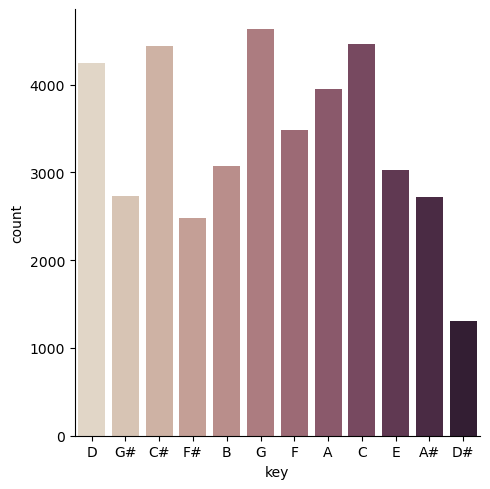

In [20]:
sns.catplot(data=music, x= "key", kind="count", palette="ch:.25")

The plot shows how many times each key is present in the dataset.

In [21]:
sns.catplot(data=music, x= "mode", kind="count", palette="ch:.25")

The plot shows the distribution of modes for the dataset

In [22]:
sns.catplot(data=music, x= "music_genre", kind="count", palette="ch:.25",)

## We then move on to looking at the continous variables.

Distribution of continuous values in numeric features is displayed on subplots to spare time and space.

Displaying distributions is possible only for features holding numeric values. For this reason, they are stored in a separate variable.

In [23]:
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)

The code lines below display the distributions of all numeric features on subplots. They are interpreted thereafter.

In [24]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.kdeplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

 The popularity of music has a bi-modal distribution with peaks at around 48 and 55, but it is not clear what "popularity" means - whether it refers to the number of weeks in a chart or the number of survey points obtained. 

 Acousticness is measured on a scale of 0.0 (not acoustic) to 1.0 (very acoustic), with higher values indicating a greater use of non-electronic instruments. The majority of songs are not acoustic. 
 
 Danceability is measured on a scale of 0.0 (low danceability) to 1.0 (high danceability), and values are distributed normally. 
 
 Music duration is given in milliseconds, with most samples not exceeding 300 seconds. 
 
 Energy is measured on a scale of 0.0 (low energy) to 1.0 (high energy), with most music pieces having high energy. 
 
 Instrumentalness measures the likelihood of a song containing vocals and is measured on a scale of 0.0 (likely containing vocal content) to 1.0 (likely containing no vocal content), with most samples having a value of 0 or close to 0. 
 
 Liveness measures the presence of an audience in a song, with most songs in the dataset performed without an audience. Loudness measures the decibel level of a song, with most music samples being quieter. 
 
 Speechiness measures the presence of spoken words in a song, with most songs having no or very few spoken words. 
 
 Tempo measures the beats per minute (bpm) of a song, with the distribution of tempo values being similar to that of popularity. 
 
 Finally, valence measures the positivity of a song, with most songs having a valence between 0.2 and 0.7. 
 
 Boxplots are useful for identifying outliers, which should be removed to avoid distorting model training and inference.

In [25]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxenplot(y=v, ax=axs[idx])
    axs[idx].set_title(k)
    idx += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Boxen plots: Boxen plots (also known as letter-value plots) are similar to box plots but provide more detail about the distribution, particularly in the tails. They can be useful for identifying outliers in datasets with complex distributions.

The data displays a few outliers in popularity, danceability, and tempo, while duration, instrumentalness, liveness, loudness, and speechiness have a large number of extreme values. Although it is common practice to remove outliers to prevent them from distorting model training and inference, in this case, the aim is to interpret classification outputs rather than creating the best model. Therefore, the outliers are not removed.

### Now, we will look at the correlation between song genre and every variable. Variables with high correlation will be the predictors for our response. 
Below are the boxplots showing the correlation between song genres and acousticness

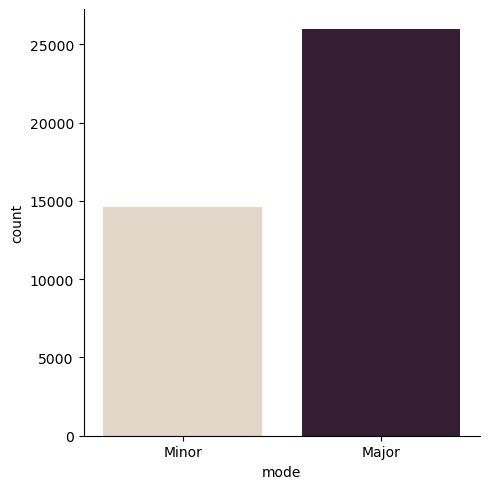

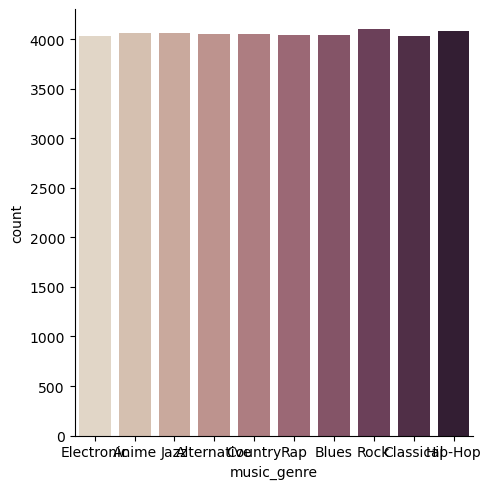

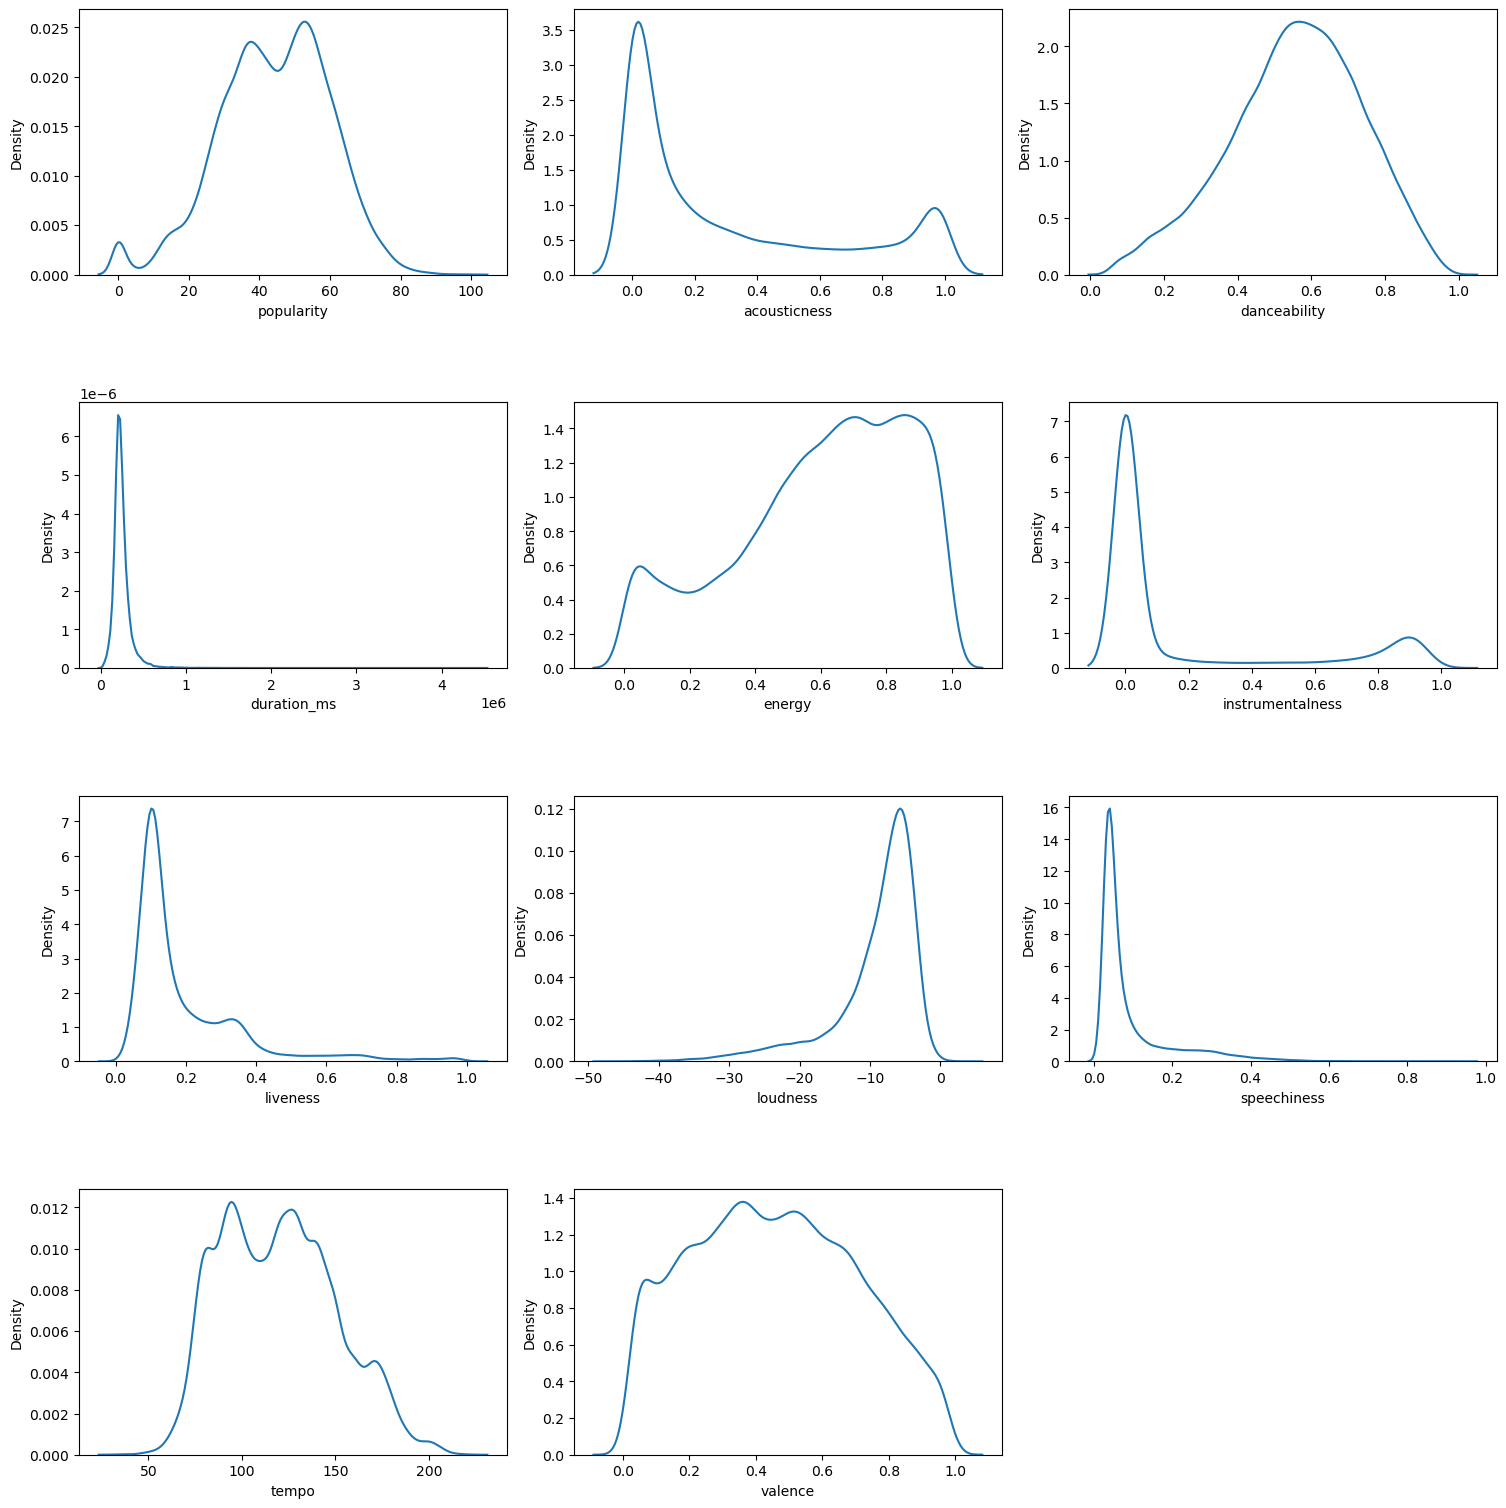

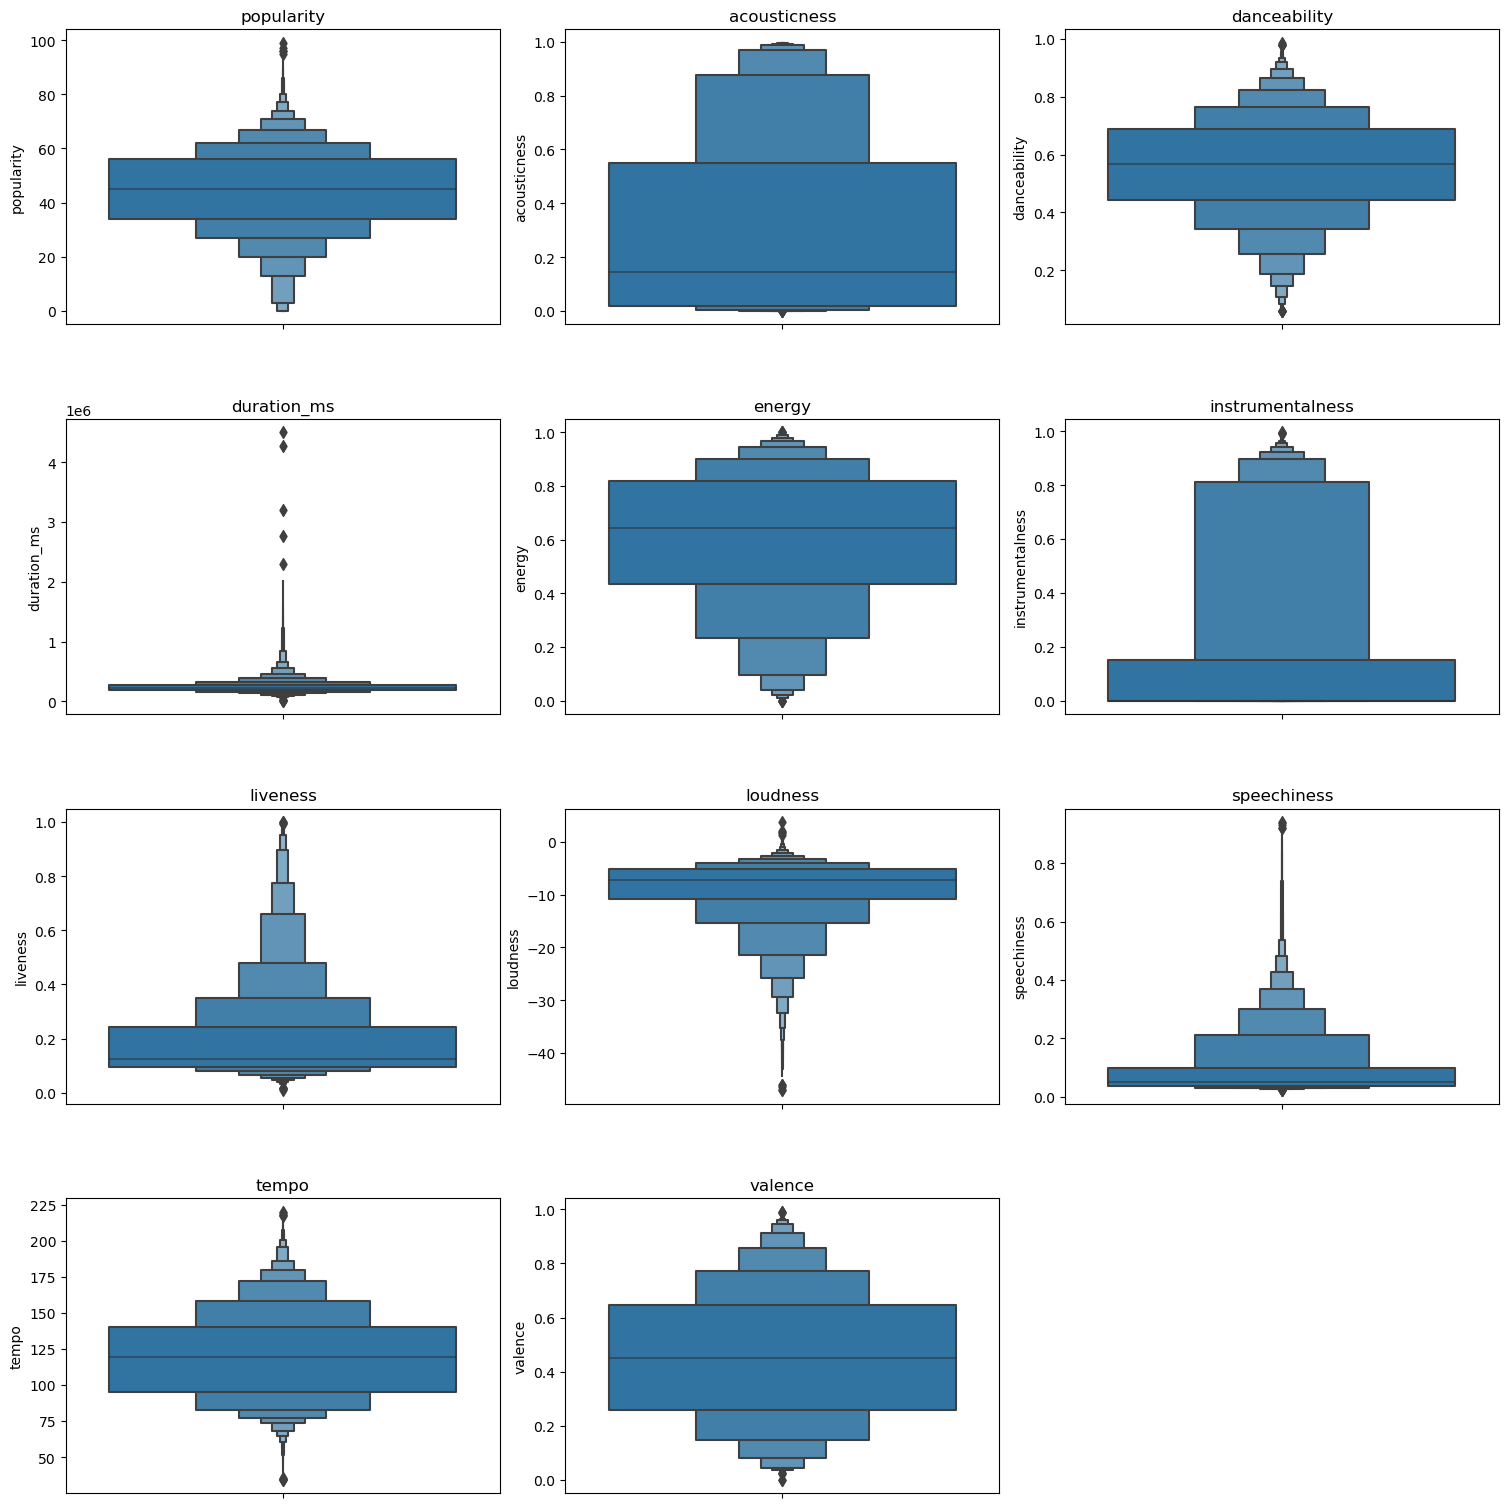

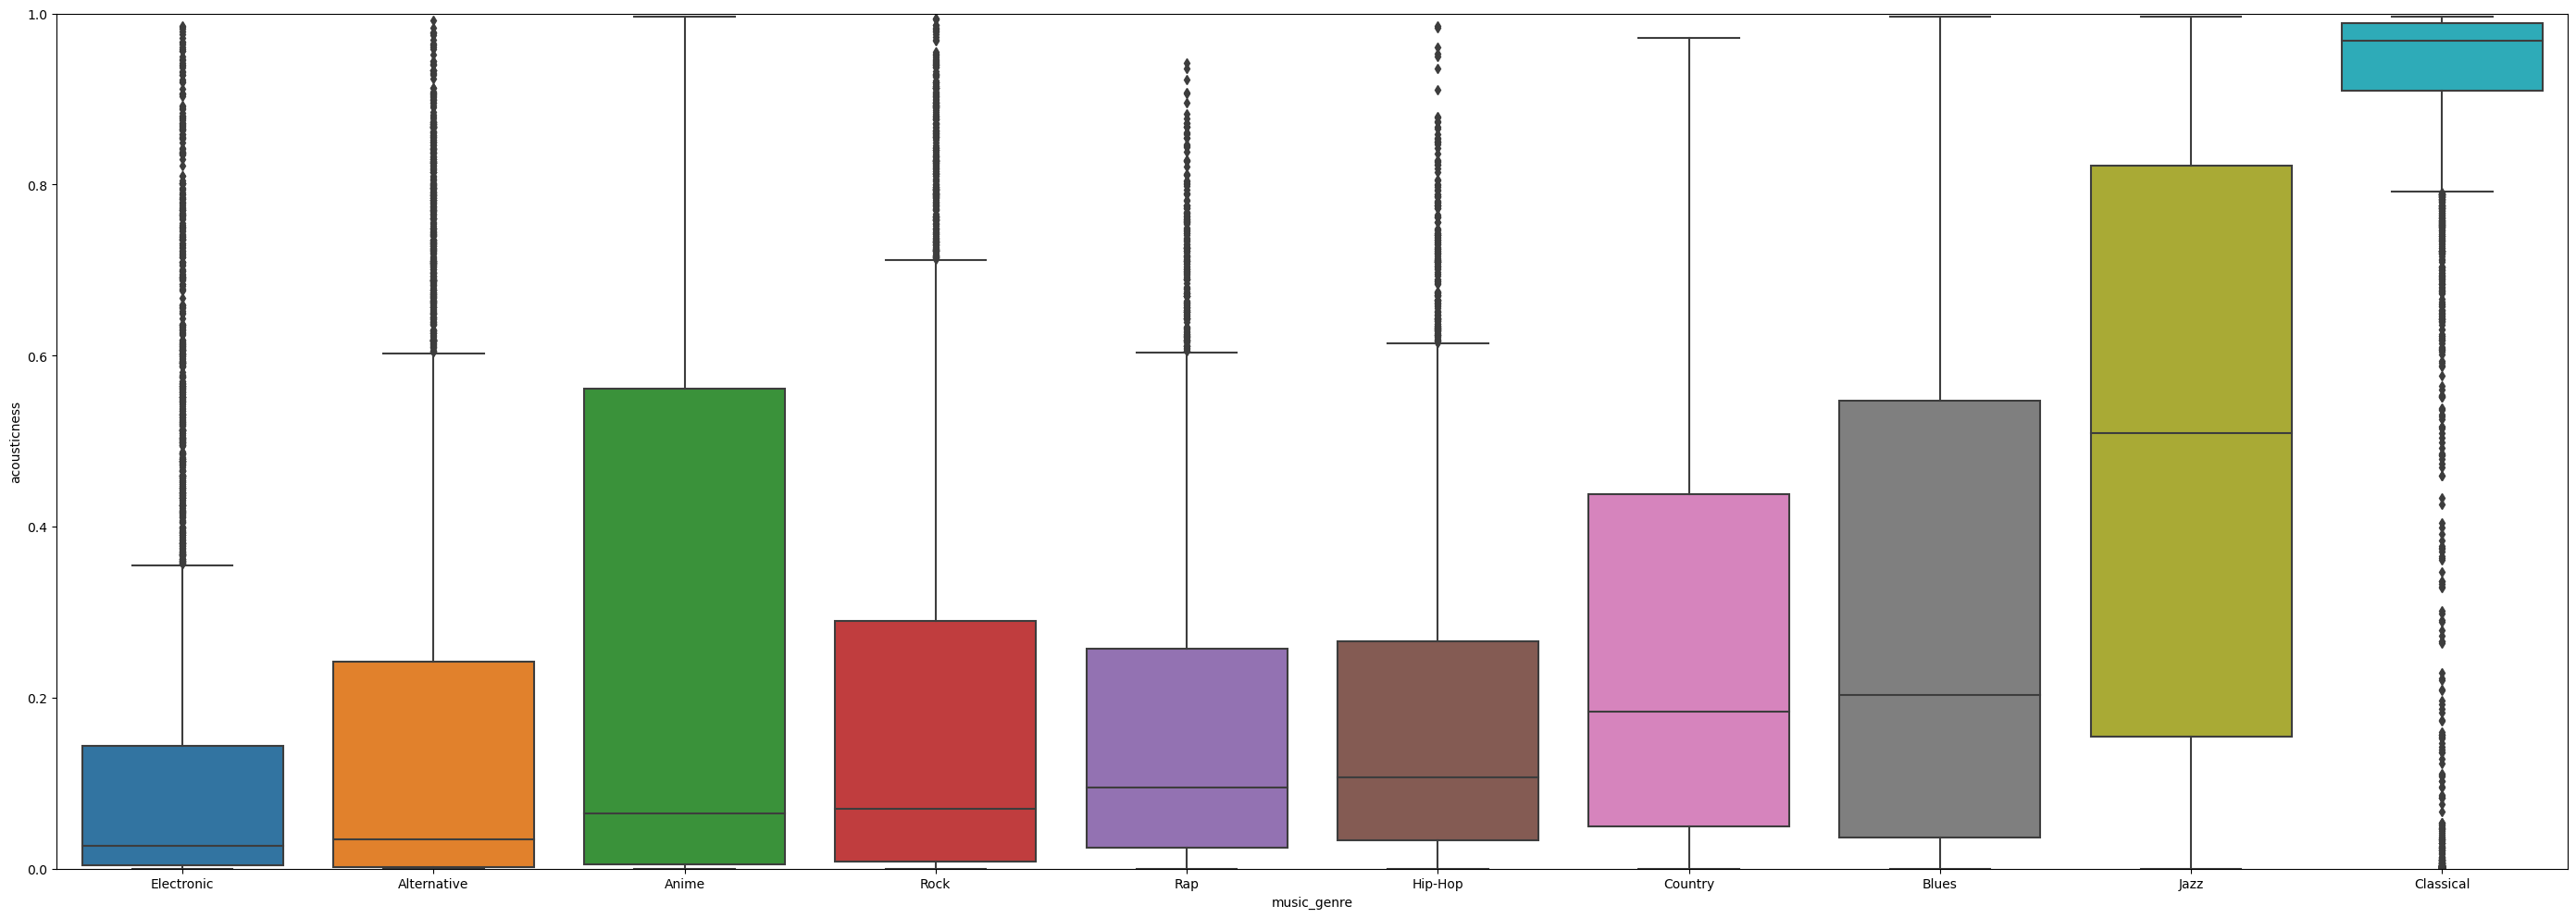

In [26]:
group_means=music.groupby(['music_genre'])['acousticness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,1.0)
sns.boxplot(x='music_genre', y='acousticness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and energy

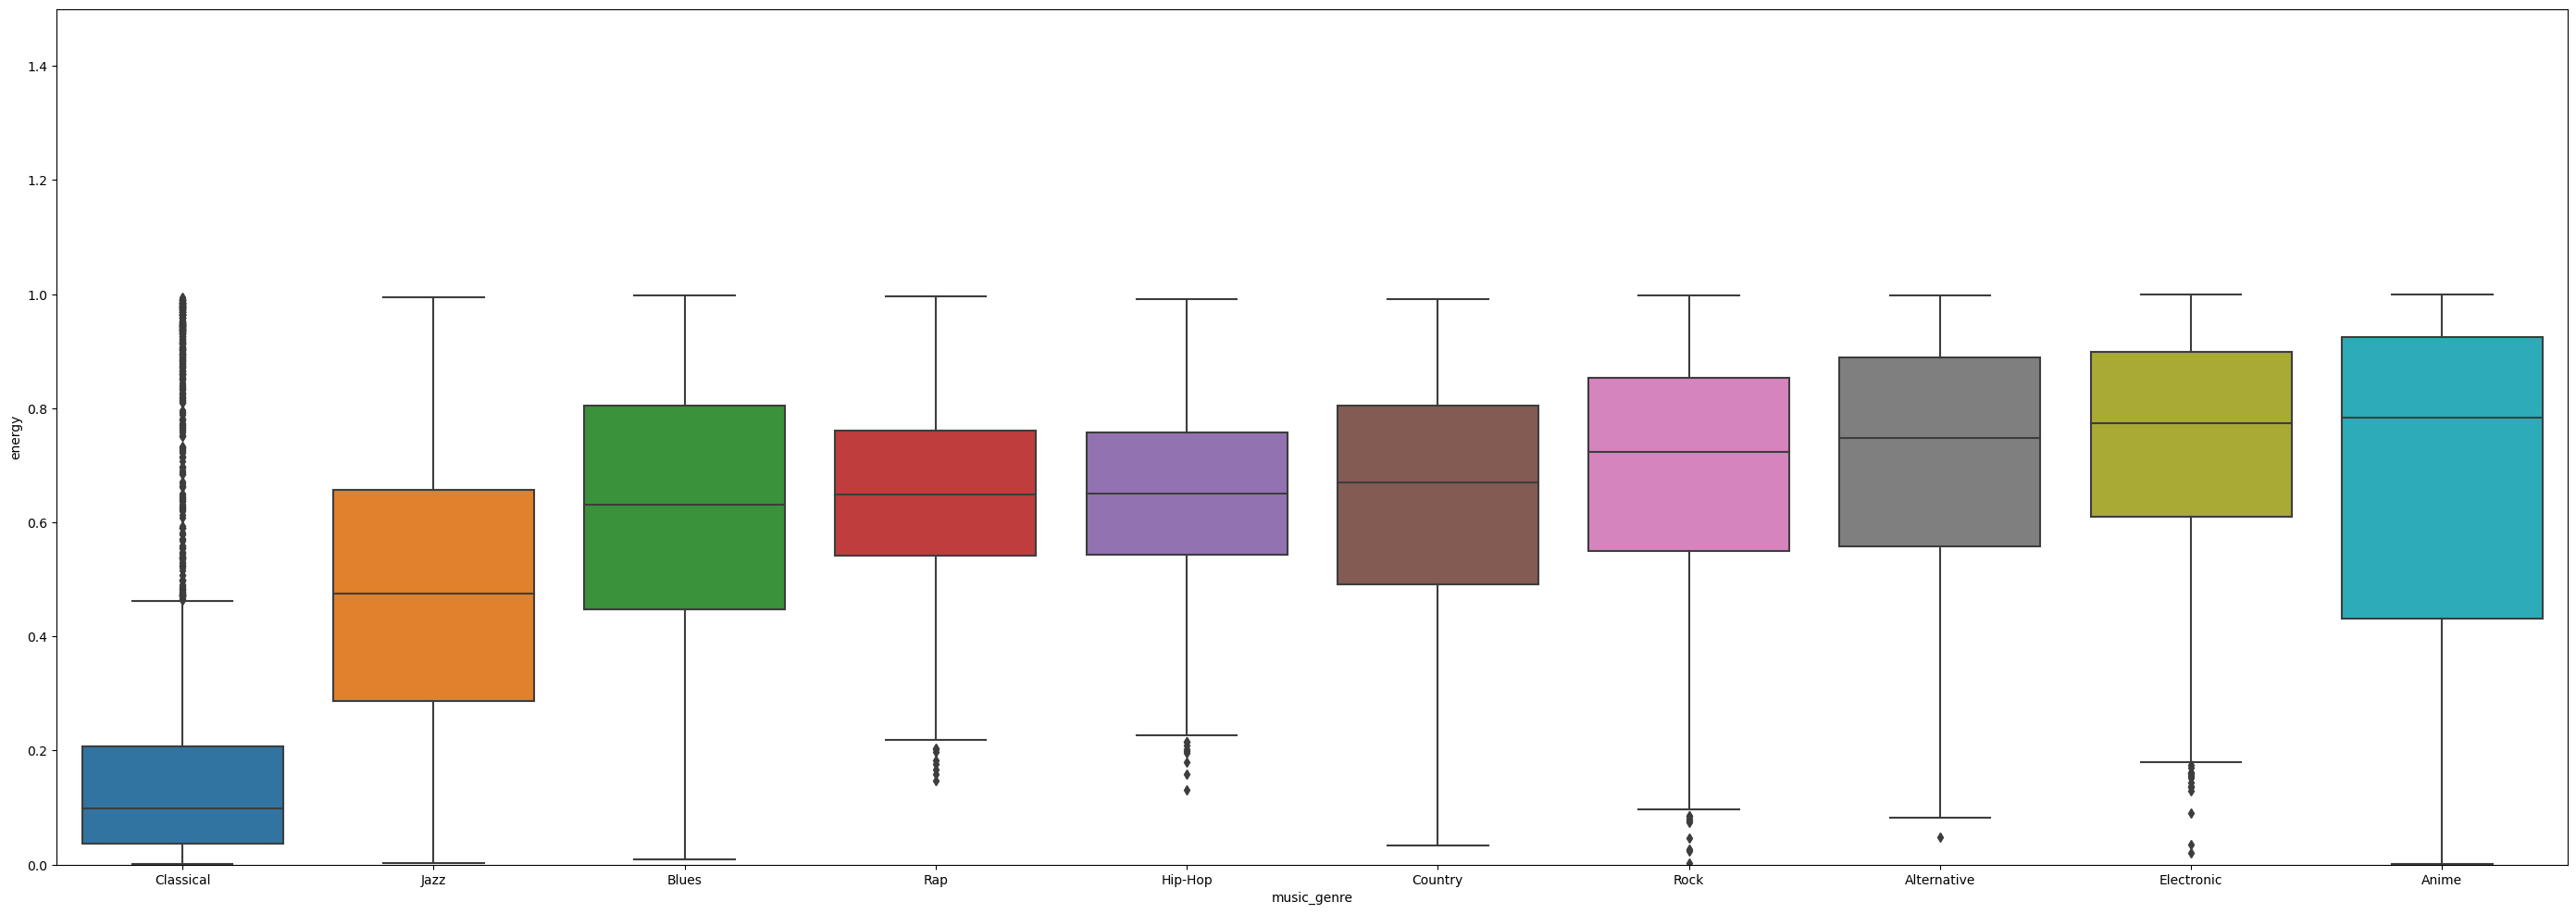

In [27]:
group_means=music.groupby(['music_genre'])['energy'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='energy', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and popularity

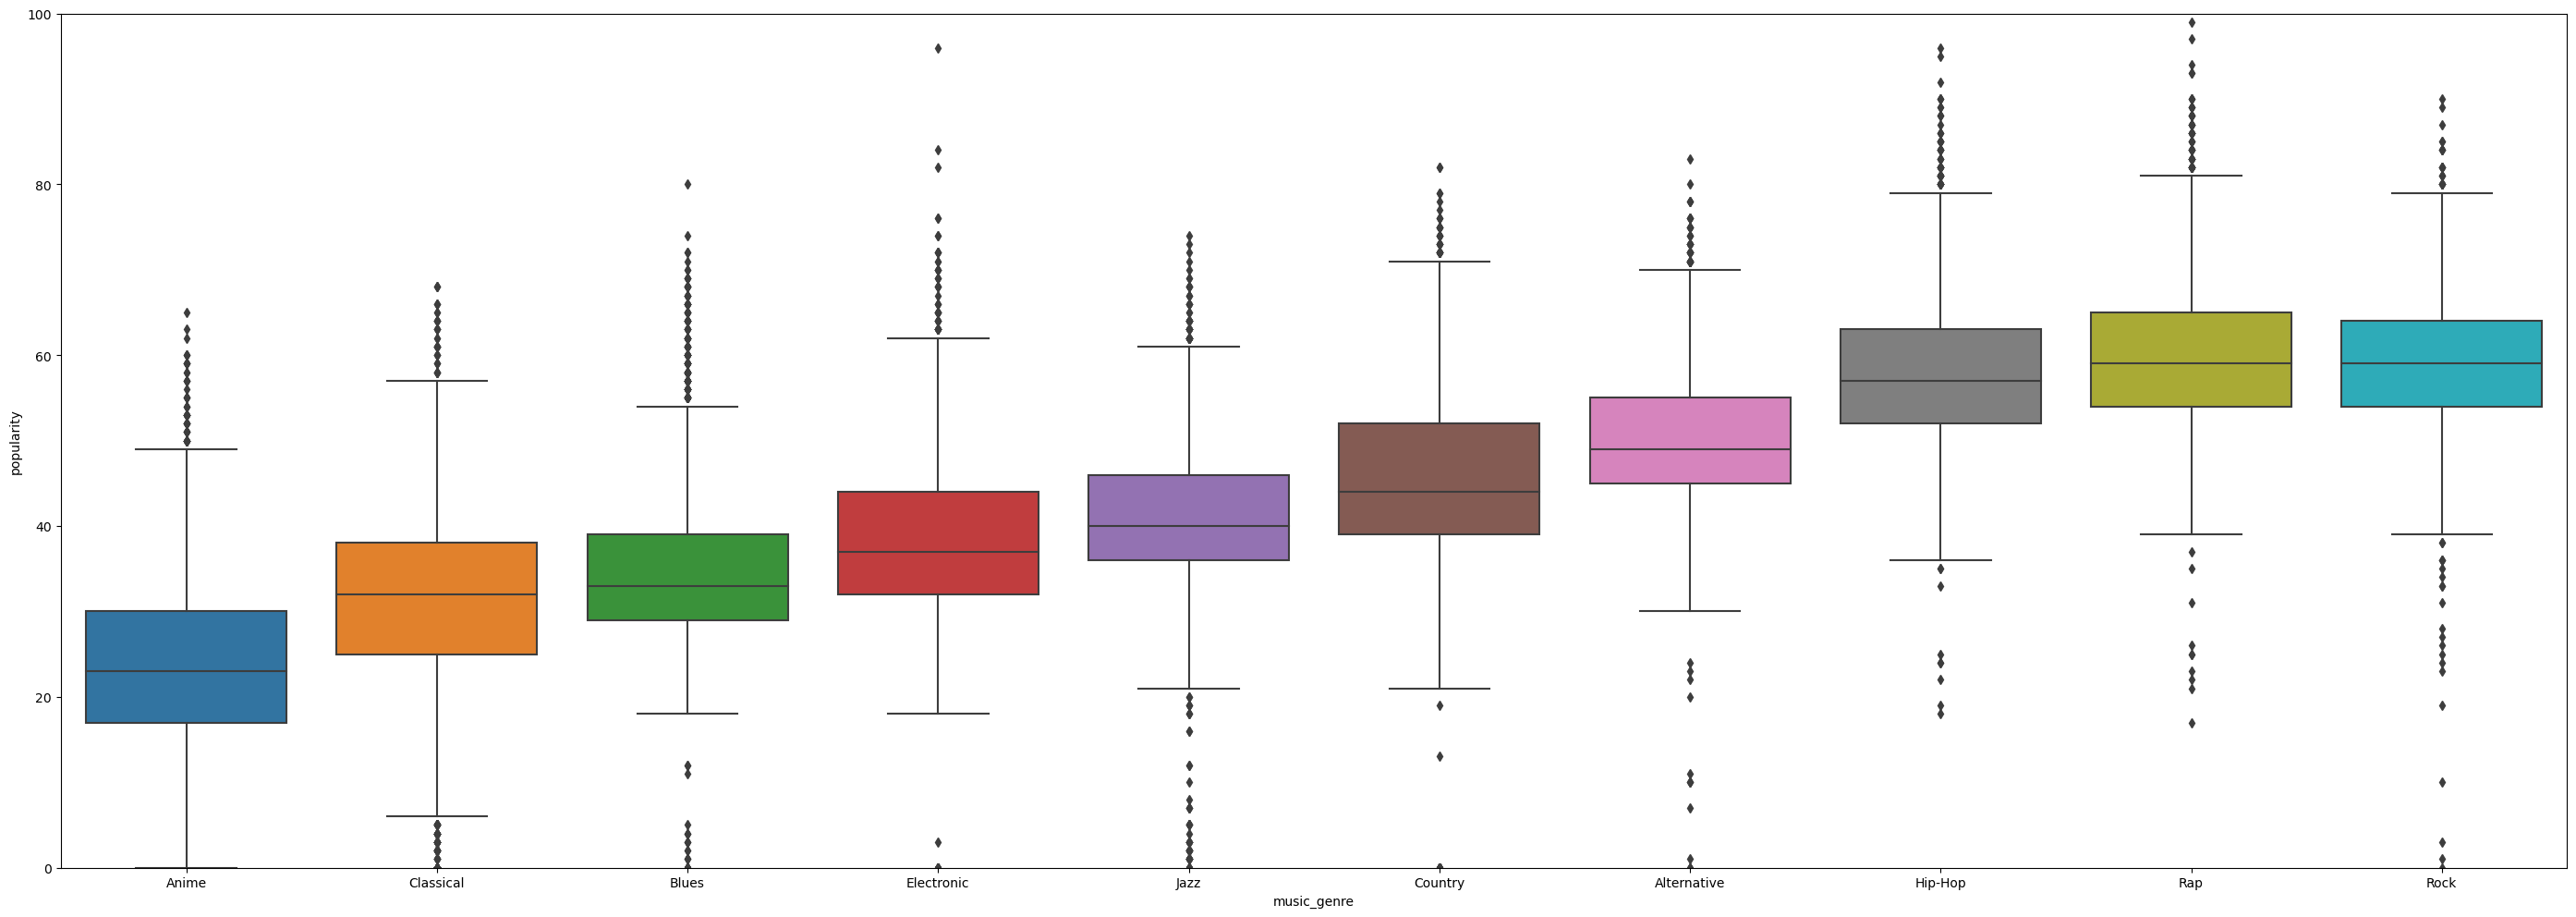

In [28]:
group_means=music.groupby(['music_genre'])['popularity'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,100)
sns.boxplot(x='music_genre', y='popularity', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and danceability

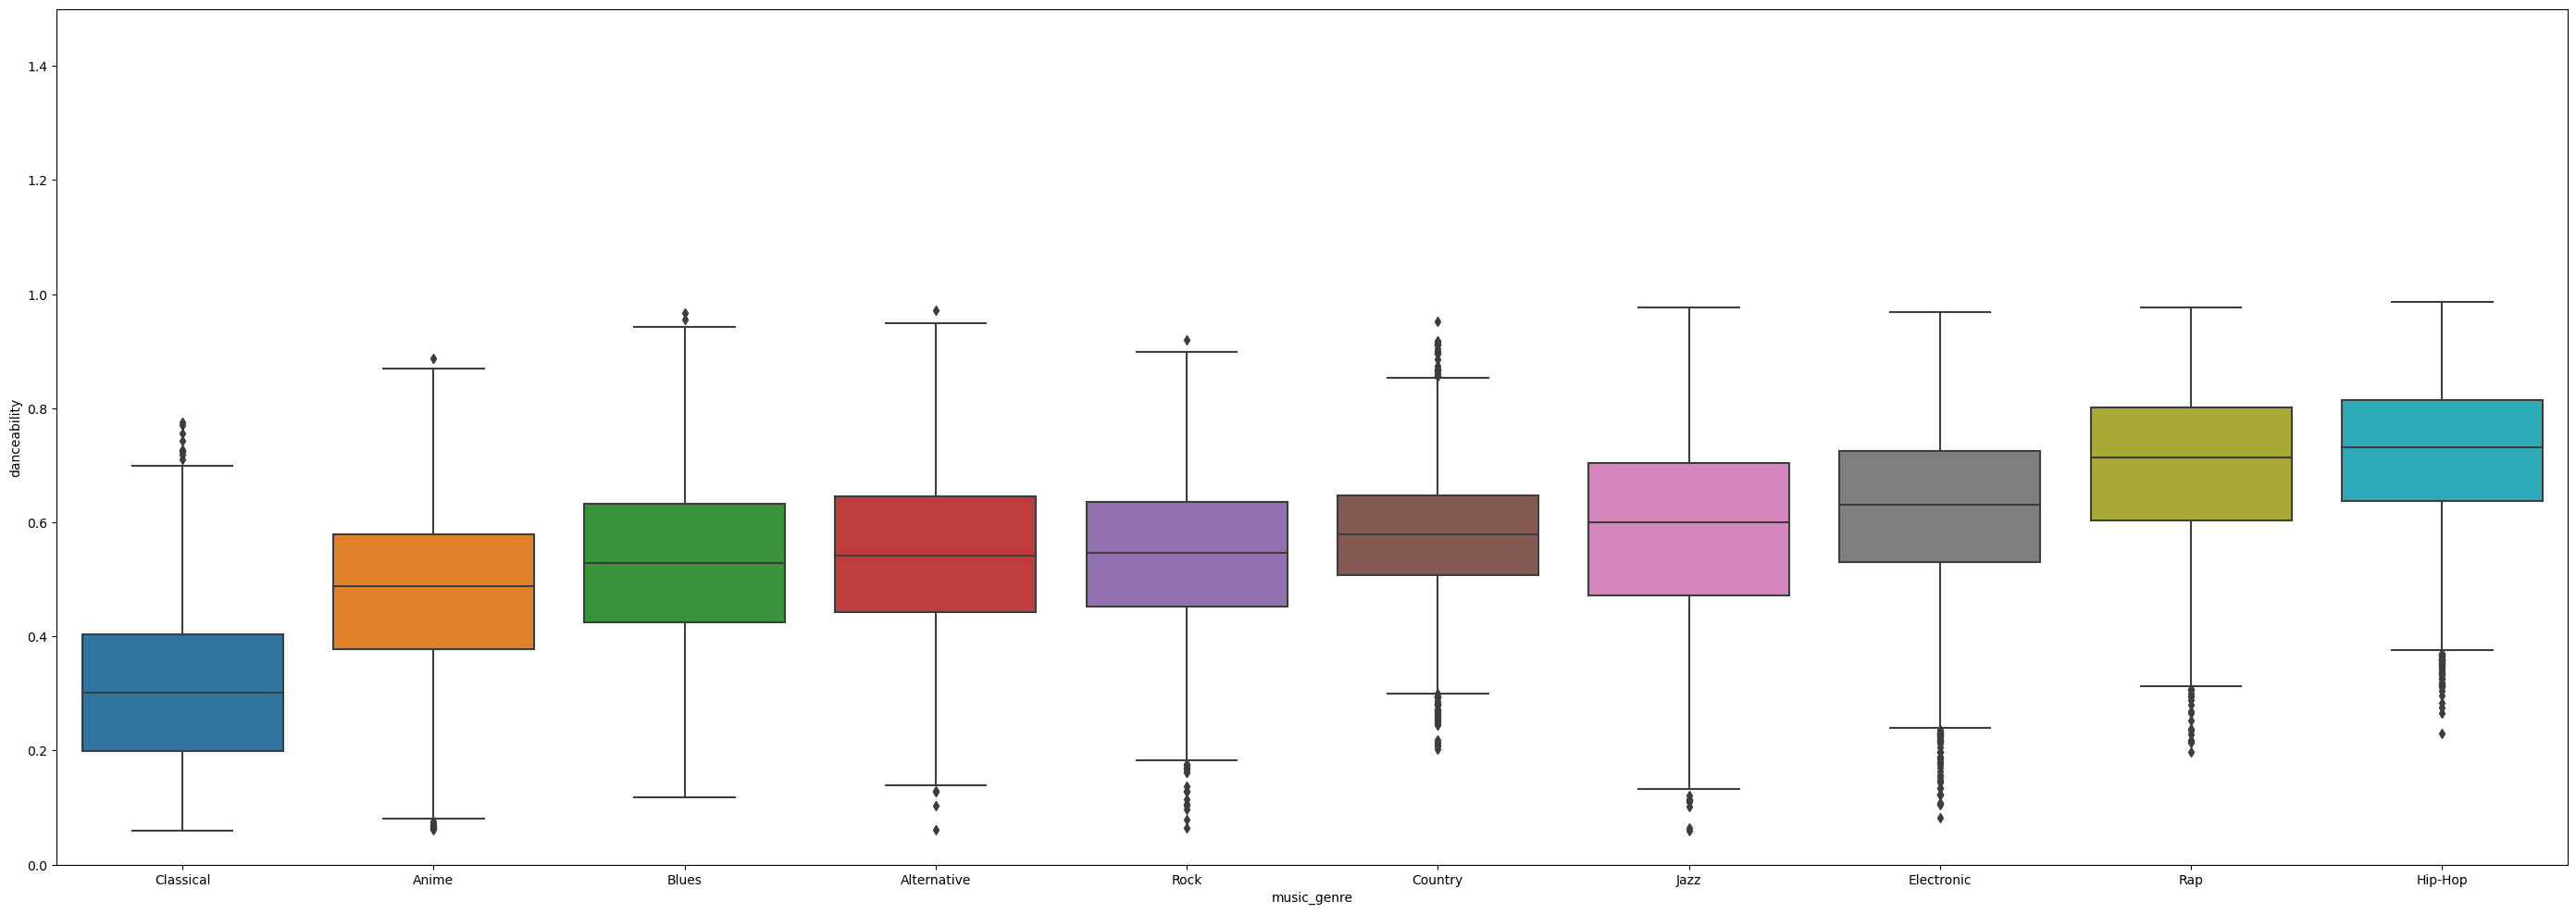

In [29]:
group_means=music.groupby(['music_genre'])['danceability'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='danceability', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and duration_ms

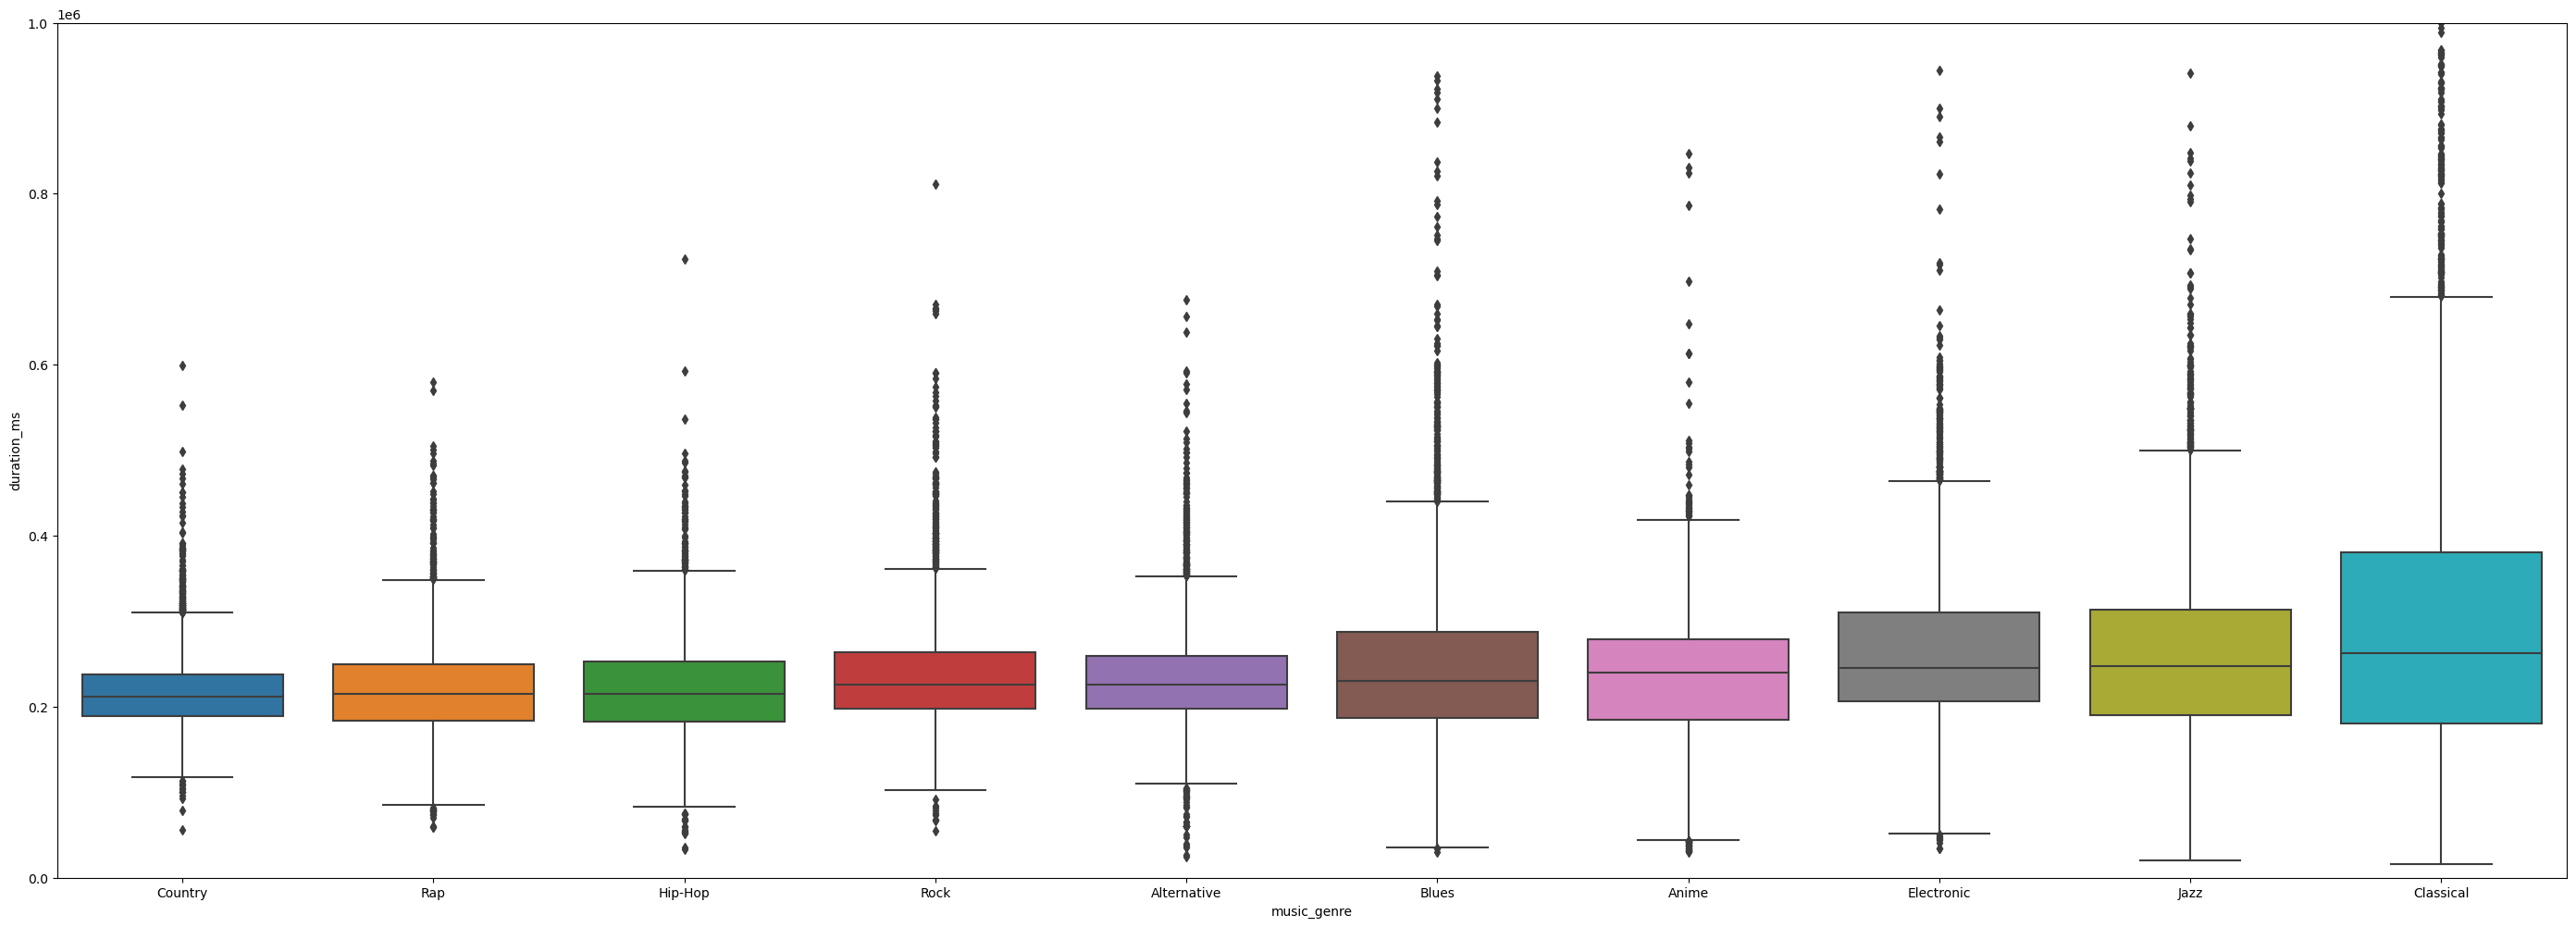

In [30]:
group_means=music.groupby(['music_genre'])['duration_ms'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1000000)
sns.boxplot(x='music_genre', y='duration_ms', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and liveness

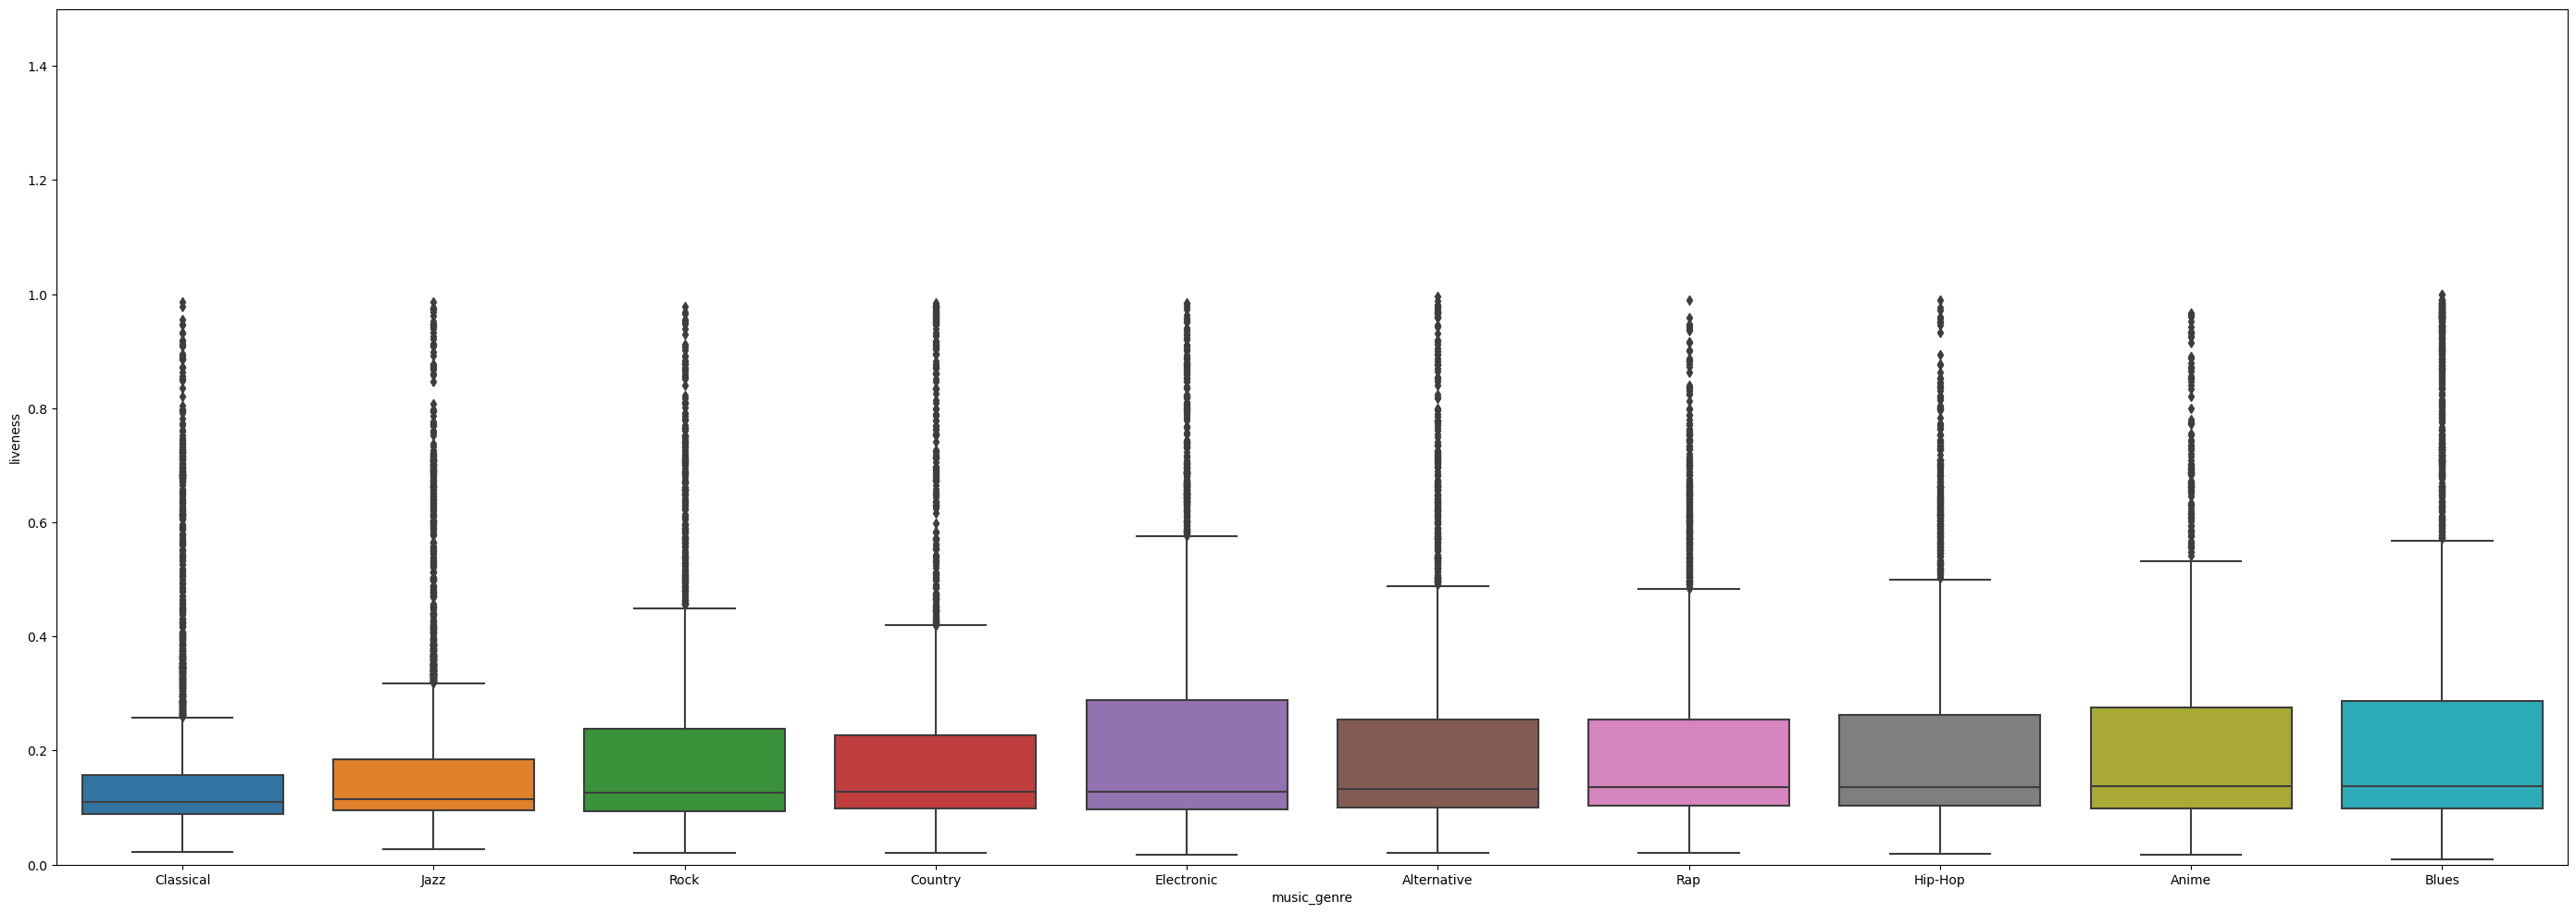

In [31]:
group_means=music.groupby(['music_genre'])['liveness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='liveness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and loudness

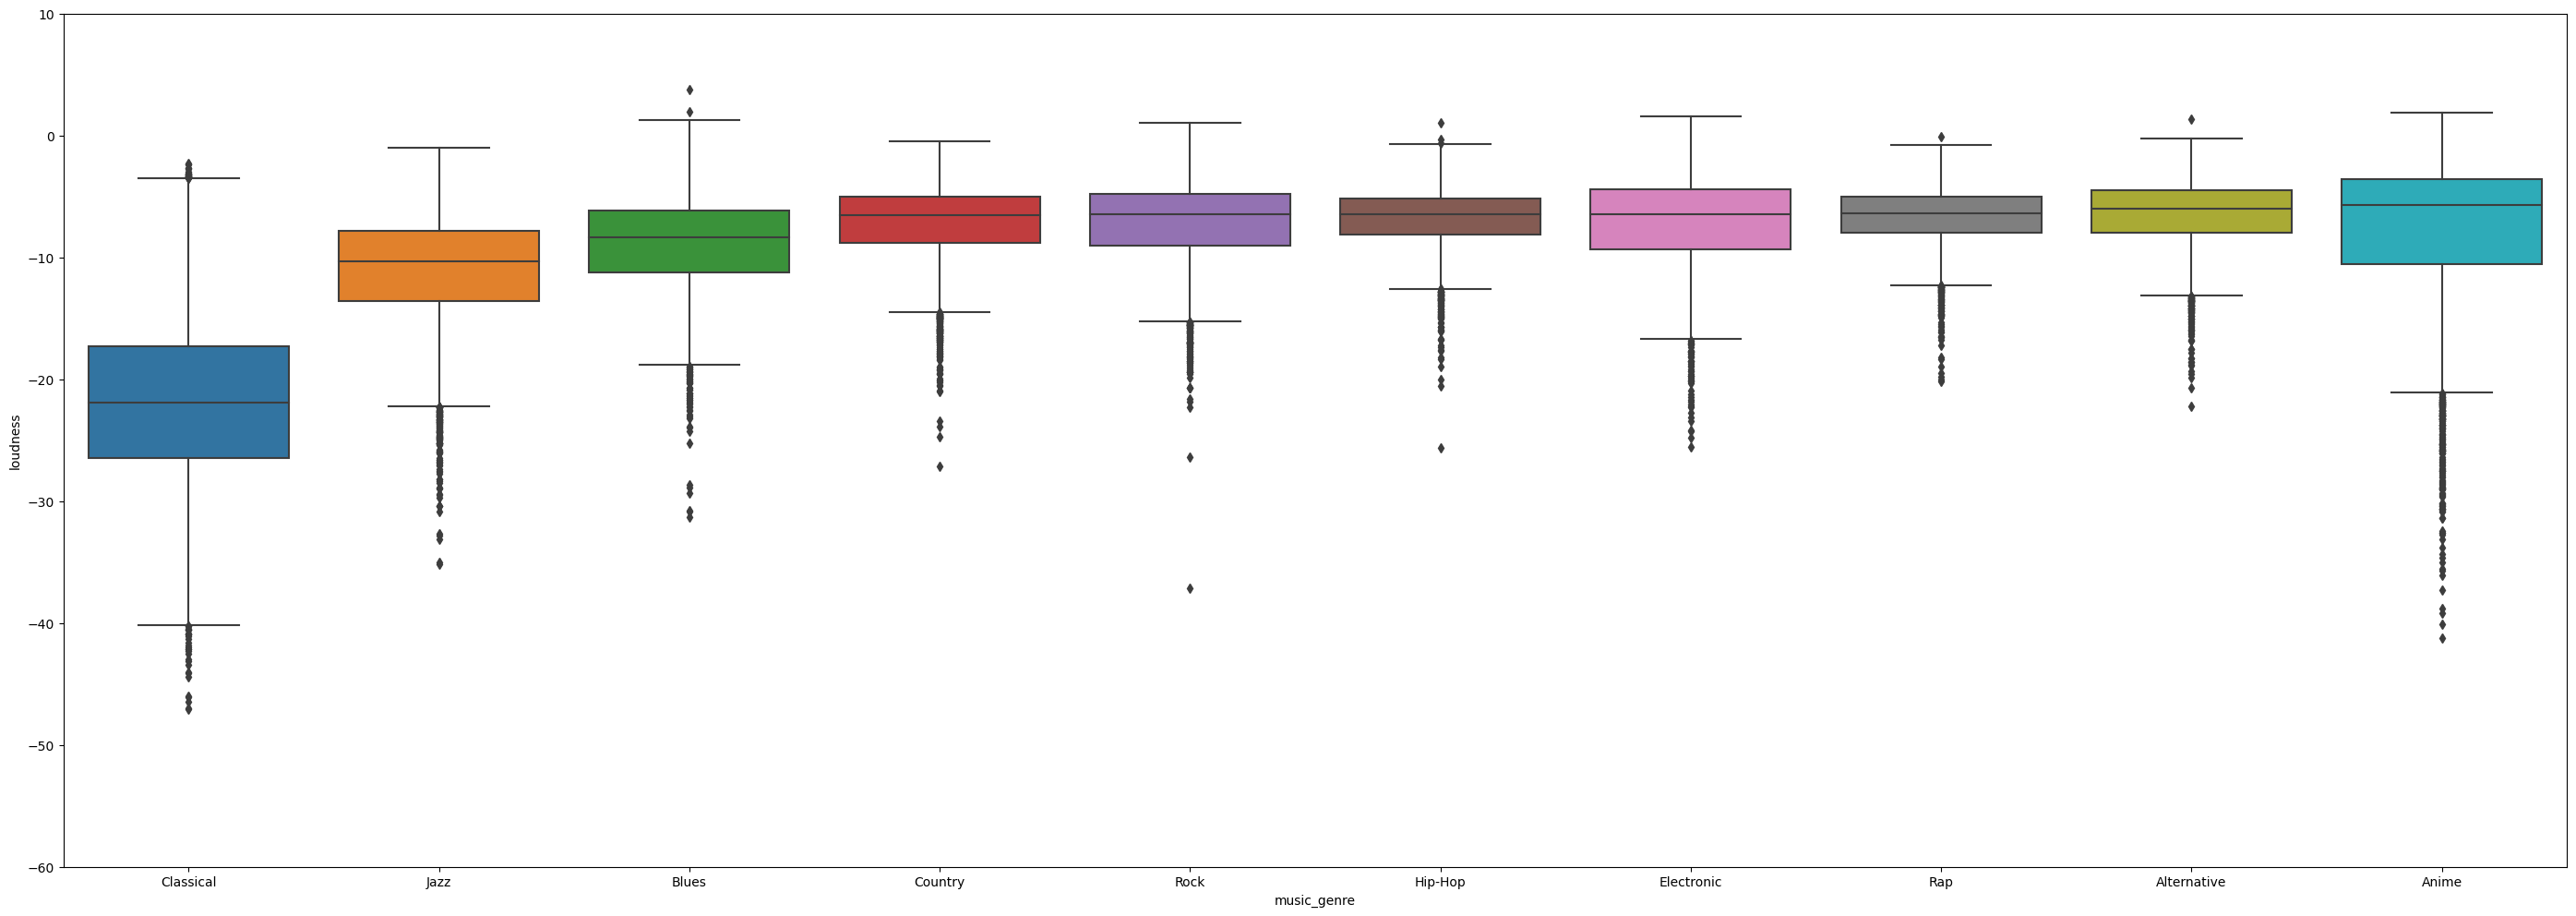

In [32]:
group_means=music.groupby(['music_genre'])['loudness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(-60,10)
sns.boxplot(x='music_genre', y='loudness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and speechiness

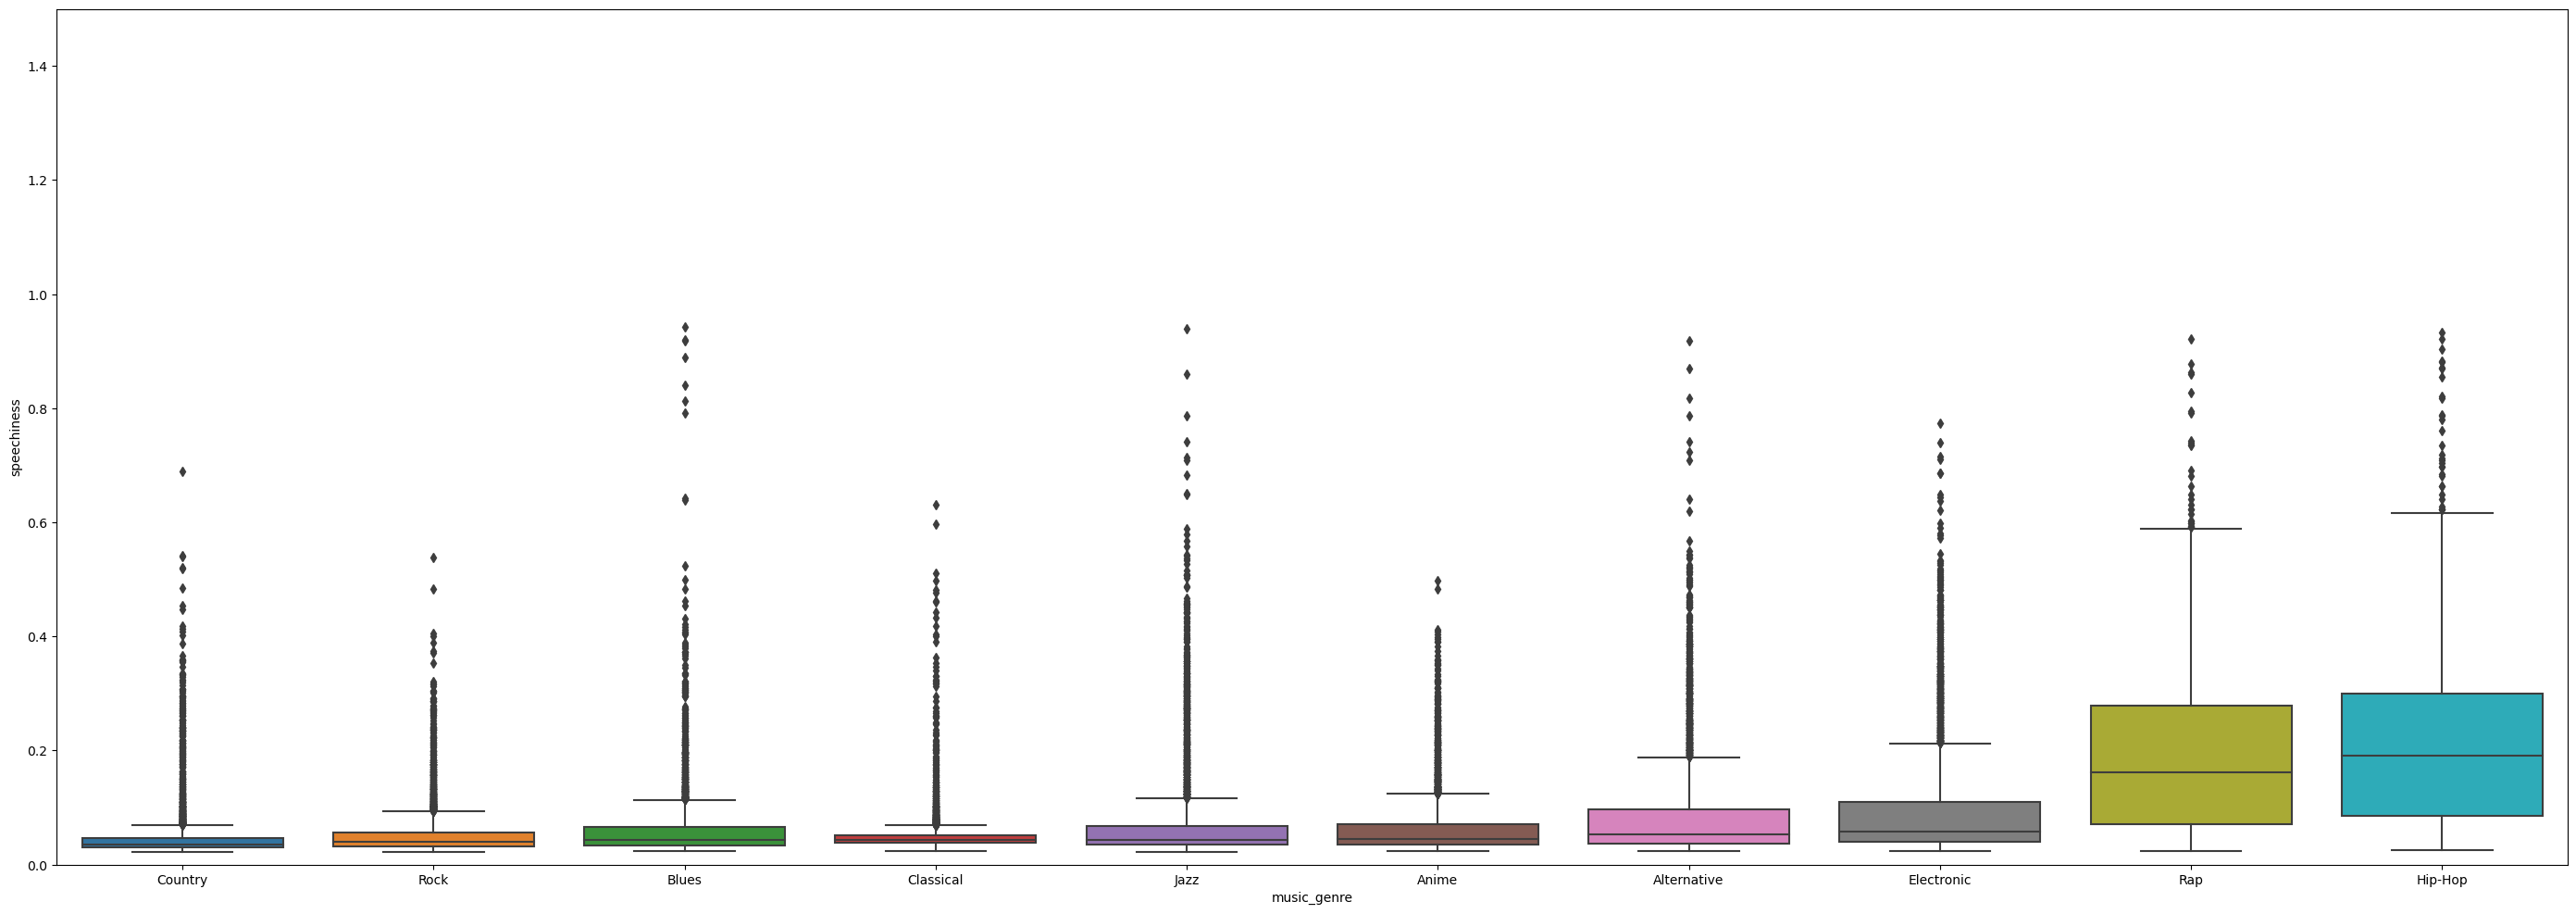

In [33]:
group_means=music.groupby(['music_genre'])['speechiness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='speechiness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and valence

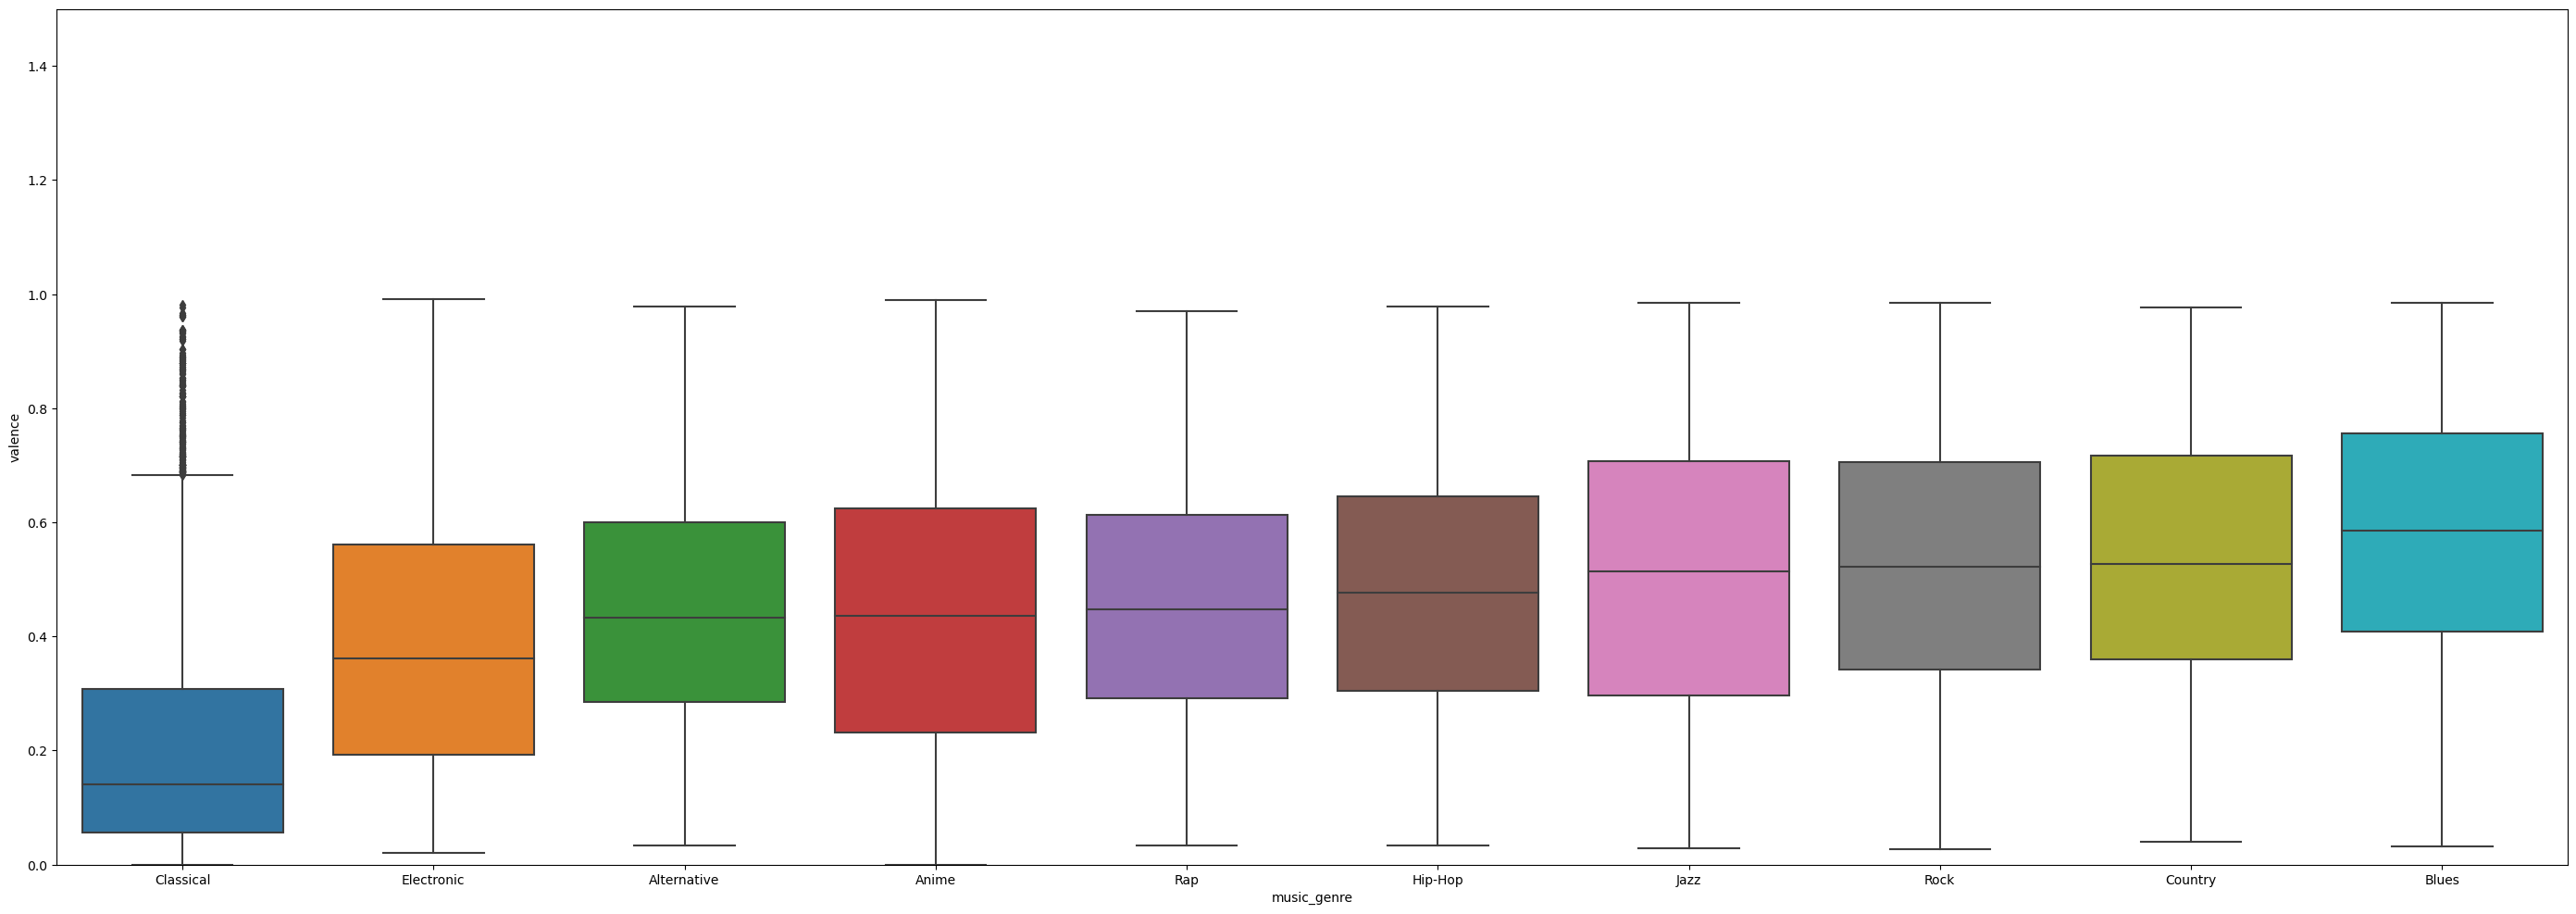

In [34]:
group_means=music.groupby(['music_genre'])['valence'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='valence', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and tempo

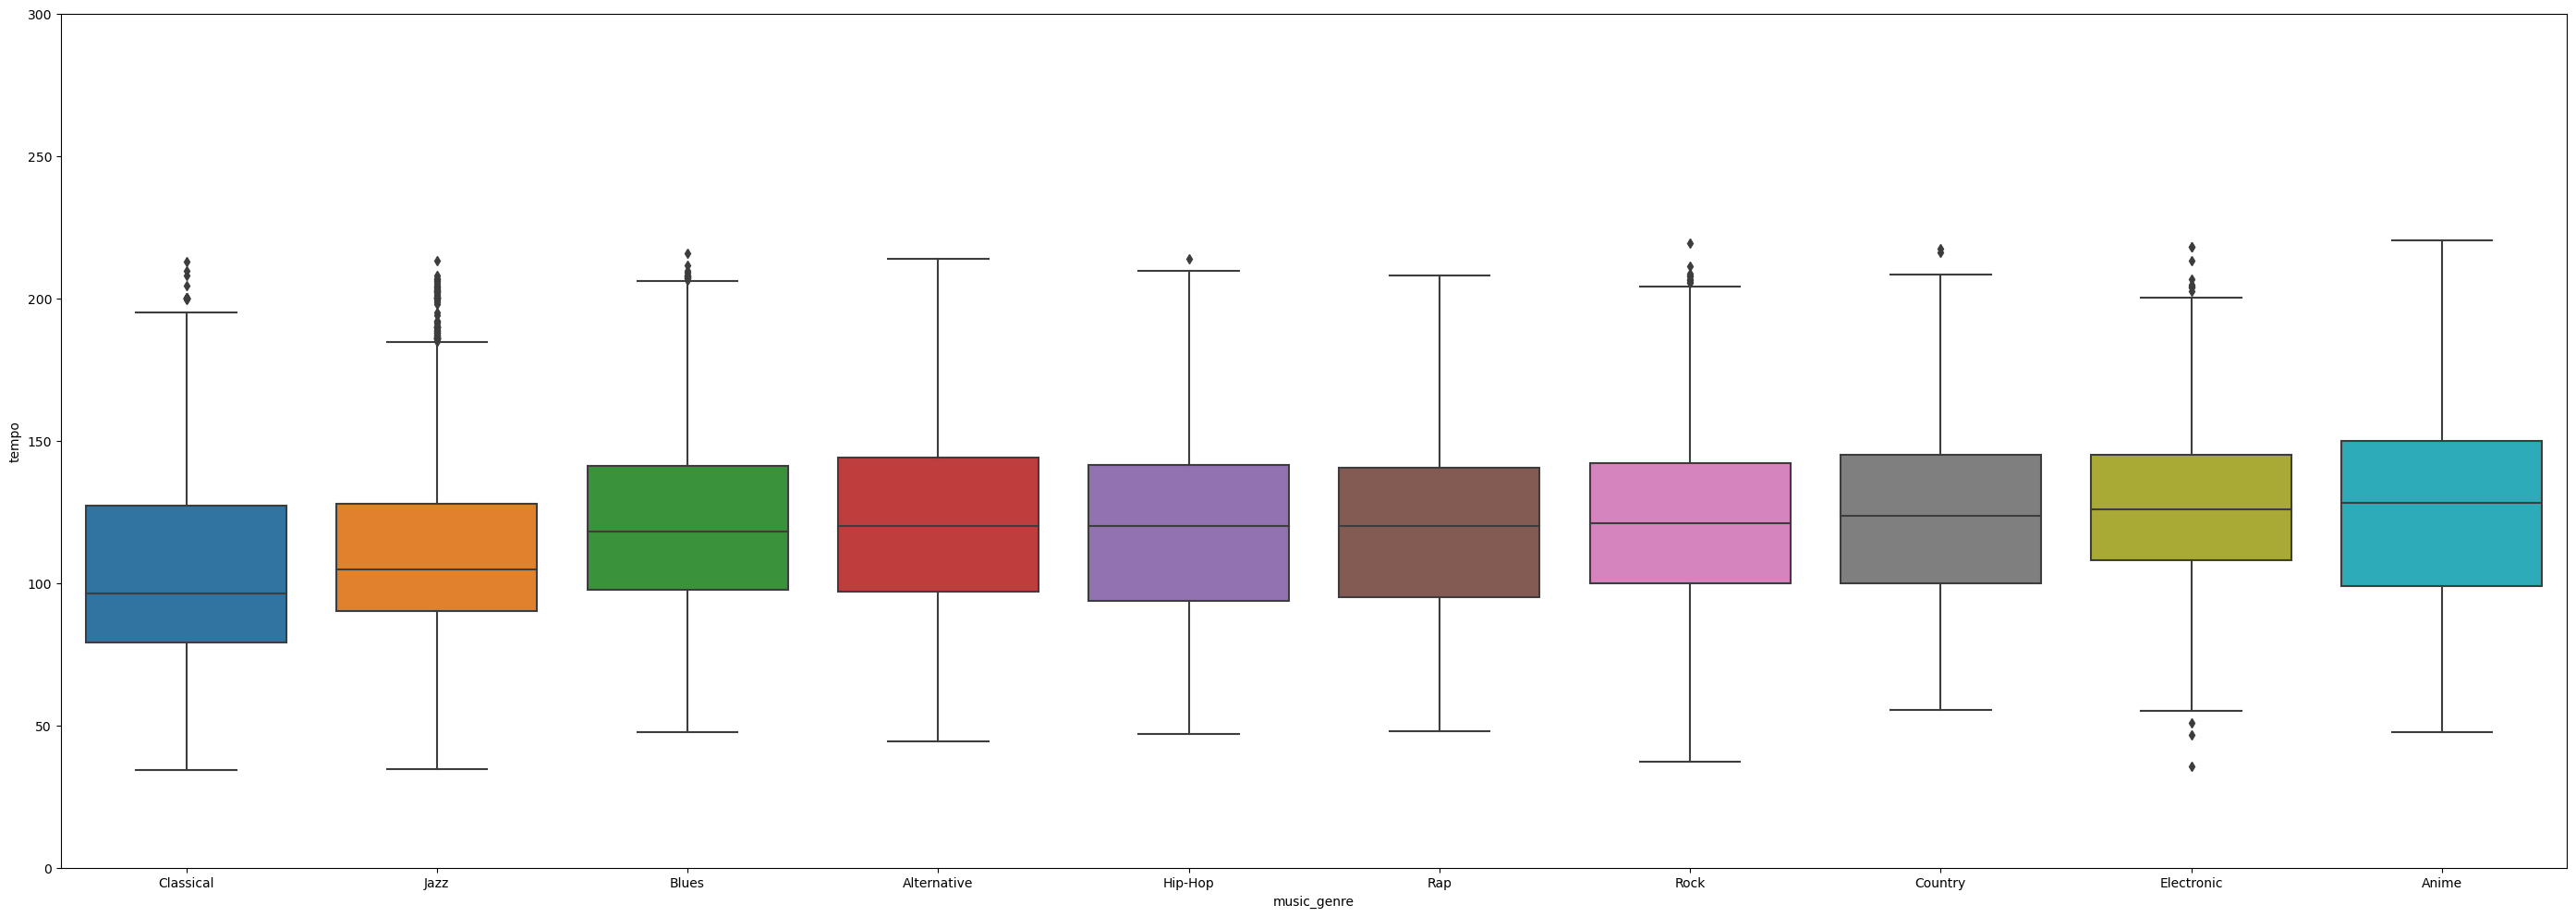

In [35]:
group_means=music.groupby(['music_genre'])['tempo'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,300)
sns.boxplot(x='music_genre', y='tempo', order=group_means.index,data=music)
plt.show()

## Chi - Square Test

Now, we will calculate the correlation between the categorical variables and the genre. This will help us understand the relation between the variables, following which we will have a clearer idea of which variables to choose as our predictors.

The correlation will be calculated using the Chi-Square Test, which finds the probability of a null hypothesis (H0). It starts out with the hypothesis H0 : that the two categorical variables are not related to each other. It then generates the probability, called the p-value, that the hypothesis is true, i.e. they are not related to each other.

If the returned p-value is above 0.5, usually we can assume that the two variables are not related. If the p-value falls below 0.5, they have a fairly strong correlation.

Below is the calculation of p-value for acousticness and genre.

In [36]:
music.dtypes


popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

As we can see here, the categorical variables apart from genre are 'key' and 'mode'. We will now calculate the p-values of these variables with the categorical variable 'genre'.

In [37]:
# importing required functions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Below is the p-value calculation for genre and key.

In [38]:
# contingency table
table = pd.crosstab(music['music_genre'],music['key'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     2022.8
p-value:            0
degrees of freedom: 99


Below is the p-value calculation for genre and mode of the song.

In [39]:
# contingency table
table = pd.crosstab(music['music_genre'],music['mode'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     1898.1
p-value:            0
degrees of freedom: 9


As we can see from the above calculations, the p-values for all of these variables is 0.0, which could be read to imply that the genre of the song is dependent on all these variables. However, this could also be because the frequencies or counts vary by large amounts across the columns. We will consider these variables in our prediction model because they clearly have a correlation with the genre of the song.

# 4) Machine Learning

We will use 2 predictive models to discover possible patterns in our dataset and make predictions based on them.

#### 4a) Encode categorical data

Most Machine Learning algorithms cannot work with strings; they expect to see numerical values in each feature. It is preferable to one-hot encode categorical features (those having string values), i.e., to expand number of features so that values for each class are placed in a separate column. Where the sample correspond to the given class, it gets 1 in the respective feature; all others get zeroes. Instead, categorical values in this exercise are encoded with LabelEncoder(). It assigns a number (integer) to each class. Thus, 5 distinctive classes in a categorical variable will get values between 0 and 4. It should be noted here that LabelEncoder() memorizes the classes. Therefore, an encoder is instantiated for each categorical variable. The labels (i.e., the music genre) are not encoded, which will make interpretation easier and more understandable. Tree-based algorithms accept string labels.

In [40]:
# Importing libraries
from sklearn.preprocessing import LabelEncoder

Encoding key feature

In [41]:
key_encoder = LabelEncoder()
music["key"] = key_encoder.fit_transform(music["key"])
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic


In [42]:
# Printing out corresponding classes

key_encoder.classes_

array(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

Encoding mode feature

In [43]:
mode_encoder = LabelEncoder()
music["mode"] = mode_encoder.fit_transform(music["mode"])
music.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,1,0.0300,115.00,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0,0.0345,127.99,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0,0.2390,128.01,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0,0.0413,145.04,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,0,0.3510,150.00,0.230,Electronic


In [44]:
# Printing out corresponding classes

mode_encoder.classes_

array(['Major', 'Minor'], dtype=object)

#### 4b) Exploration and Visualization

Perform basic statistical exploration and visualization on the Train Set.


We will start by setting up a Multi-Variate Classification problem.   



In [45]:
# Extract Response and Predictors
y = pd.DataFrame(music["music_genre"])
predictors = ["popularity","acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","valence"]
X = pd.DataFrame(music[predictors]) 

In [46]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (30420, 1) (30420, 13)
Test Set  : (10140, 1) (10140, 13)


In [47]:
# Summary Statistics for Response
y_train["music_genre"].value_counts()

Jazz           3084
Rock           3061
Blues          3056
Anime          3055
Hip-Hop        3037
Classical      3030
Rap            3026
Alternative    3025
Electronic     3023
Country        3023
Name: music_genre, dtype: int64

In [48]:
# Summary Statistics for Predictors
X_train.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,30420.000000,30420.000000,30420.000000,3.042000e+04,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000
mean,44.241979,0.307544,0.557935,2.456453e+05,0.599789,0.181650,5.359961,0.193514,-9.131154,0.360519,0.093559,119.873538,0.455889
std,15.500200,0.341900,0.178490,1.110976e+05,0.264671,0.325677,3.461607,0.161668,6.145052,0.480159,0.101017,30.624494,0.246723
min,0.000000,0.000000,0.059600,1.550900e+04,0.000795,0.000000,0.000000,0.009670,-47.046000,0.000000,0.022300,34.470000,0.000000
25%,34.000000,0.020000,0.442000,1.906168e+05,0.431000,0.000000,3.000000,0.097000,-10.876000,0.000000,0.036100,94.917500,0.257000
50%,45.000000,0.146000,0.567000,2.274950e+05,0.642000,0.000158,5.000000,0.126000,-7.289500,0.000000,0.049000,119.820000,0.447000
75%,55.000000,0.554000,0.687000,2.763330e+05,0.816000,0.154000,8.000000,0.243000,-5.171750,1.000000,0.098825,140.240000,0.647000
max,96.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,11.000000,1.000000,3.744000,1.000000,0.939000,220.280000,0.992000


In [49]:
# Draw the distribution of Response
sns.catplot(y = "music_genre", data = y_train, kind = "count")

## 4c) Classification Tree

In [50]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
y_predict = dectree.fit(X_train,y_train).predict(X_test)


In [51]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,20))
plot_tree(dectree, filled=True, rounded=True, fontsize = 7, 
          feature_names= X_train.columns, 
          class_names= ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"])

[Text(0.5, 0.875, 'popularity <= 47.5\ngini = 0.9\nsamples = 30420\nvalue = [3025, 3055, 3056, 3030, 3023, 3023, 3037, 3084, 3026\n3061]\nclass = Alternative'),
 Text(0.25, 0.625, 'loudness <= -16.897\ngini = 0.851\nsamples = 16814\nvalue = [1182, 3002, 2747, 2853, 1871, 2542, 123, 2431, 28\n35]\nclass = Jazz'),
 Text(0.125, 0.375, 'danceability <= 0.493\ngini = 0.411\nsamples = 2906\nvalue = [6, 286, 94, 2193, 18, 38, 2, 269, 0, 0]\nclass = Rock'),
 Text(0.0625, 0.125, 'gini = 0.286\nsamples = 2457\nvalue = [3, 213, 24, 2061, 6, 13, 0, 137, 0, 0]\nclass = Rock'),
 Text(0.1875, 0.125, 'gini = 0.773\nsamples = 449\nvalue = [3, 73, 70, 132, 12, 25, 2, 132, 0, 0]\nclass = Rock'),
 Text(0.375, 0.375, 'popularity <= 25.5\ngini = 0.842\nsamples = 13908\nvalue = [1176, 2716, 2653, 660, 1853, 2504, 121, 2162, 28, 35]\nclass = Jazz'),
 Text(0.3125, 0.125, 'gini = 0.509\nsamples = 2339\nvalue = [10, 1586, 341, 104, 30, 193, 5, 59, 5, 6]\nclass = Jazz'),
 Text(0.4375, 0.125, 'gini = 0.84\nsamples

## 4d) Confusion Matrix


#### We start by Finding Optimal Depth via K-fold Cross-Validation
We use a range of tree depths to evaluate and to plot the estimated performance +/- 2 standard deviations for each depth using K-fold cross validation. We provide a Python code that can be used in any situation, where you want to tune your decision tree given a predictor tensor X and labels Y. The code includes the training set performance in the plot, while scaling the y-axis to focus on the cross-validation performance.

In [52]:
# Import essential models and functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [53]:
#printing out the optimum depth

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-9 tree achieves the best mean cross-validation accuracy 51.18672 +/- 0.1968% on training dataset


The method selects tree depth 9-10 because it achieves the best average accuracy on training data using cross-validation folds with size 5. The lower bound of the confidence interval of the accuracy is high enough to make this value significant. When more nodes are added to the tree, it is clear that the cross-validation accuracy changes towards zero.

#### Now we print the confusion matrix

In [54]:
# Extract Response and Predictors
y = pd.DataFrame(music['music_genre'])
X = pd.DataFrame(music[predictors])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 9)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5701840894148587

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5142998027613412



<AxesSubplot:>

In the above confusion matrix, 0-9 are the indexes for ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"] respectively

The "Goodness of Fit" refers to the performance of the model, which has been evaluated using the accuracy metric. The accuracy metric measures the proportion of correctly classified instances out of all instances.

In this case, the model was trained on a training dataset and tested on a separate testing dataset. The classification accuracy for the training dataset was found to be around 0.57 - 0.60 depending on the depth of tree, which means that the model correctly classified around 57% - 60% of the instances in the training dataset. The classification accuracy for the testing dataset was found to be around 0.52, which means that the model correctly classified around 52% of the instances in the testing dataset.

This shows that the decision tree may be an acceptable model for predicting song genres

# 4.2a) Basic exploration

Second Machine Learning Model: Random Forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [57]:
y_pred = rf.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=.75)
cnf1 = confusion_matrix(y_pred,y_test)
sns.heatmap(cnf1,annot=True)

<AxesSubplot:>

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5465483234714004


## Implementing GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

#### The code below takes around 12minutes to run, since GridSearchCV fit algorithm is O(n^2) at best, so it is extremely slow.

In [60]:
grid_param = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=grid_param,scoring="accuracy",cv=5)
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 35]},
             scoring='accuracy')

In [61]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 35}

In [62]:
rf3 = RandomForestClassifier(n_estimators = 35, max_depth = 10, min_samples_leaf = 5)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=35)

In [63]:
y_train_pred3 = rf3.predict(X_train)
y_test_pred3 = rf3.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred3))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6546679815910585

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5601577909270217



<AxesSubplot:>

Using the GridSearch CV does returns us a better classification accuracy. Random forest classifiers generated a better outcome than decision tree after applying both models to our dataset. Therefore, the best method would be to forecast music genres using random forest classifiers. 

Although the outcome might not be the best, 0.66 and 0.56 accuracy are regarded as relatively decent in predicting the music genres based on audio attributes given that it comprises numerous classes and does not have a strong association between each variable and its response "genre".